## Этап 1. Получение данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем файл games.csv и сохраним его в переменной df.

In [2]:
df = pd.read_csv('/datasets/games.csv')

Получение первых и последних строк таблицы.

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Обнаружено, что:    
- В массиве данных 16 715 строк;
- В 6 столбцах из 10 имеются пропуски;
- Названия столбцов не в нижнем регистре;
- Столбец с годом выпуска имеет тип `object`;
- Столбец с рейтингом пользователей имеет тип `object`.


## Этап 2. Предобработка данных

Заменим названия столбцов

In [5]:
df.columns = df.columns.str.lower()
df = df.rename(columns = {'rating': 'esrb_rating'})
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуем данные в нужные типы.

In [6]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [7]:
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  esrb_rating      9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Обработаем пропуски

In [8]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['year_of_release'], inplace=True)
df['esrb_rating'].fillna('No_ESRB', inplace=True)
df = df.drop_duplicates()

Посчитаем суммарные продажи во всех регионах

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df.reindex(columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
                         'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'esrb_rating'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,No_ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,No_ESRB
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,No_ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,No_ESRB


**Выводы**


- формат названий столбцов приведён к стандартному виду;
- название столбца `Rating` измнено на `esrb_rating` для понятности;
- заглушка "tbd" в столбцу `user_score` заменена на `NaN`;
- пропуски в столбце `esrb_rating` заменены на "No_ESRB";
- формат данных столбцов изменён в соответствии с их содержанием;
- создан столбец `total_sales` с суммой продаж каждой игры во всех регионах.

## Этап 3. Исследование данных

Посмотрим, сколько игр выпускалось в разные годы.

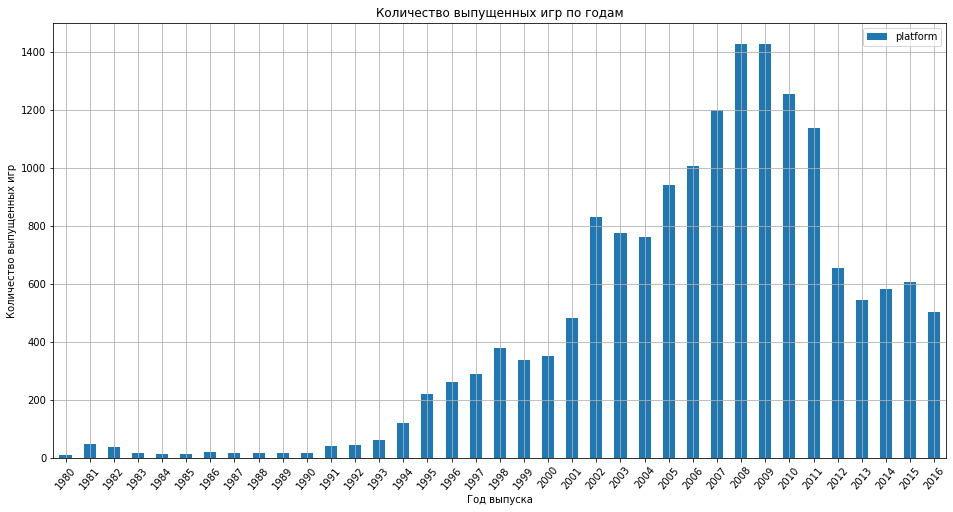

In [11]:
df.pivot_table(index='year_of_release', values='platform', aggfunc='count').plot.bar(rot=50, figsize=(16, 8), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам')
None

Посмотрим динамику выпуска игр по платформам.

In [12]:
# Выбираем топ-10 платформ по суммарным продажам
top_10_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).index

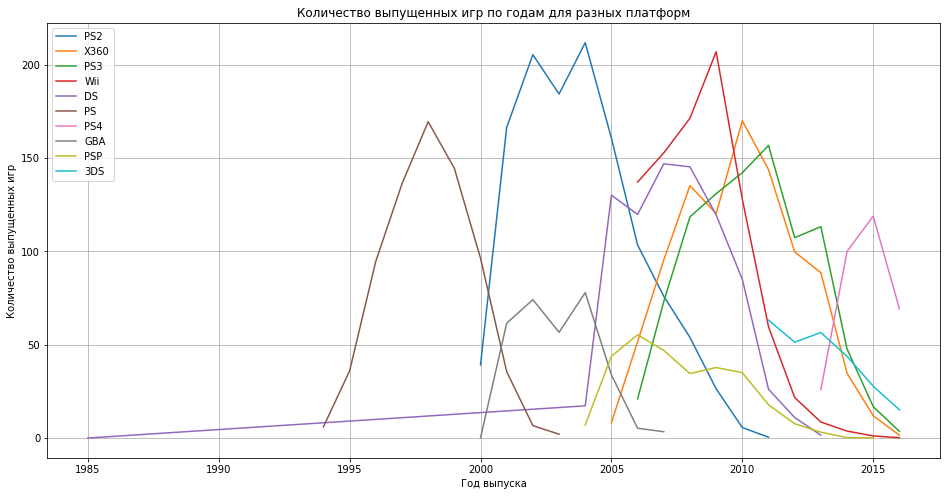

In [13]:
plt.figure(figsize=(16, 8))
for platform in top_10_platforms:
    df_plt = df.query('platform == @platform')
    plt.plot(df_plt.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
plt.grid(True)
plt.legend(top_10_platforms, loc='upper left')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам для разных платформ')
None

In [14]:
df.drop(df.query('platform == "DS" and year_of_release < 2000').index, inplace=True)

Судя по графику, каждя платформа, кроме `PC`, имеет срок жизни примерно 5-7 лет. Скорее всего это связано с тем, что в случае персонального компьютера происходит независимый апгрейд определённых элементов системы, в то время как все остальные платформы существуют в текущем виде до разработки нового поколения, которое заменяет предыдущее, что занимает примерно 5-7 лет.
    
Исходя из этого отсеим данные до 2011 включительно, оставим только последние 5 лет наблюдений (2012-2016).

Выберем лидирующие платформы.

In [15]:
current_df = df.query('year_of_release > 2011')

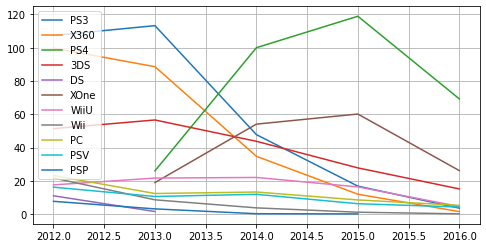

In [16]:
plt.figure(figsize=(8, 4))
for platform in current_df['platform'].unique():
    df_plt = current_df.query('platform == @platform')
    plt.plot(df_plt.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
plt.grid(True)
plt.legend(current_df['platform'].unique(), loc='upper left')
None

Судя по всему нам предоставленны данные за неполный 2016, из-за чего под конец всё падает. Смотрим на 2014-2015-ый - видим только две растущие платформы: `PS4` и `XOne`. Не удивительно, так как это актуальные на указанный год консоли, поделившие между собой практически весь консольный рынок.
    
Откуда такие и данные и почему в них `PC` выглядит настолько невзрачно, хотя имеет примерно такую же долю рынка, как и все консоли вместе взятые, мне не очень понятно. 

Могу предположить, что в данных учитываются только продажи физических копий, так как, например World of Warcraft: Mists of Pandaria, согласно этим данным, на 2016 год имеет тираж 1.82 миллиона копий по всему миру, однако общедоступны официальные заявления Blizzard о том, что только за первую неделю было продано 2.7 миллиона копий.

Оценим общее распределение для каждой платформы.

In [17]:
past_gen = ['PC', 'PS3', 'X360', 'DS', 'PSP', 'Wii']
next_gen = ['PC', 'PS4', 'XOne', '3DS', 'PSV', 'WiiU']

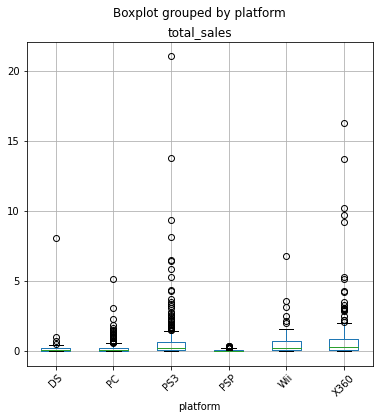

In [18]:
current_df.query('platform in @past_gen').boxplot(column='total_sales', by='platform', figsize=(6, 6), rot=45)
None

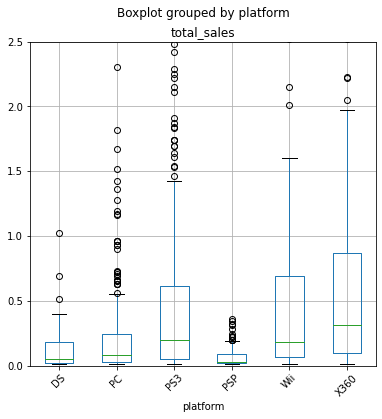

In [19]:
current_df.query('platform in @past_gen').boxplot(column='total_sales', by='platform', figsize=(6, 6), rot=45)
plt.ylim(0, 2.5)
None

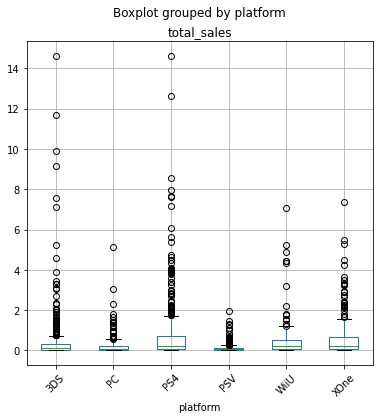

In [20]:
current_df.query('platform in @next_gen').boxplot(column='total_sales', by='platform', figsize=(6, 6), rot=45)
None

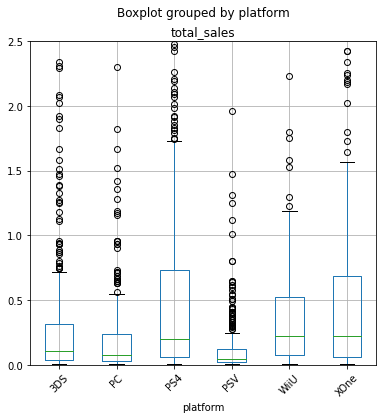

In [21]:
current_df.query('platform in @next_gen').boxplot(column='total_sales', by='platform', figsize=(6, 6), rot=45)
plt.ylim(0, 2.5)
None

  
- данные по `PC` всё ещё неккоректны, предположительная причина описана выше;
- портативные консоли (`DS` и `3DS`; `PSP` и `PSV`) не способны тягаться с полноцеными (да и не пытаются, а скорее дополняют их);
- консольный рынок поделили между собой PlaStation (`PS3` и `PS4`), Nintendo (`Wii` и `WiiU`), и Microsoft (`X360` и `XOne`);
- "сквозь поколения" ситуация не меняется.

Рассмотрим каждуюю платформу отдельно, изучим взаимосвязи

In [22]:
current_df['user_score'] *= 10
current_df

/tmp/ipykernel_167/406407788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['user_score'] *= 10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,82.0,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,81.0,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,No_ESRB
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,No_ESRB
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,53.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,No_ESRB


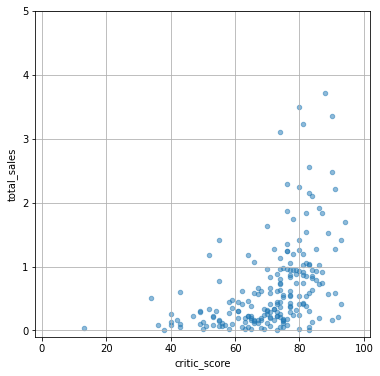

In [23]:
current_df.query('platform == "PS3" and ~critic_score.isna()').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6, 6), grid=True)
plt.xlim(-2, 102)
plt.ylim(-0.1, 5)
None

In [24]:
print('Для платформы PS3 за 2012-2016 годы корреляция продаж с оценками критиков составляет:', current_df.query('platform == "PS3" and ~critic_score.isna()')['total_sales'].corr(current_df.query('platform == "PS3" and ~critic_score.isna()')['critic_score']))

Для платформы PS3 за 2012-2016 годы корреляция продаж с оценками критиков составляет: 0.3314972592629587


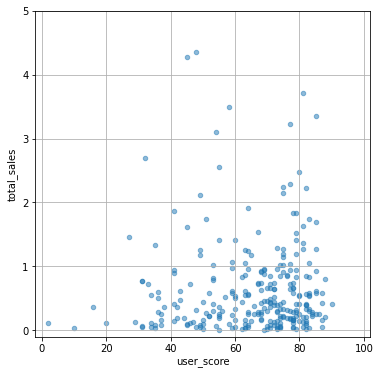

In [25]:
current_df.query('platform == "PS3" and ~user_score.isna()').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6, 6), grid=True)
plt.xlim(-2, 102)
plt.ylim(-0.1, 5)
None

In [26]:
print('Для платформы PS3 за 2012-2016 годы корреляция продаж с оценками пользователей составляет:', current_df.query('platform == "PS3" and ~user_score.isna()')['total_sales'].corr(current_df.query('platform == "PS3" and ~user_score.isna()')['user_score']))

Для платформы PS3 за 2012-2016 годы корреляция продаж с оценками пользователей составляет: -0.005143522887113775


Имеем следующие результаты:

- корреляция продаж с оценками критиков составляет 0.33 (слабая положительная связь);
- корреляция продаж с оценками пользователей составляет -0.005 (связь отсутствует).
 

In [27]:
def correlation(platform, df_score, score):
    current_df.query('platform == @platform and ~@df_score.isna()').plot(x=score, y='total_sales', kind='scatter', alpha=0.5, figsize=(6, 6), grid=True)
    plt.xlim(-2, 102)
    plt.ylim(-0.1, 5)
    None
    return print(f'Для платформы {platform} за 2012-2016 годы корреляция продаж с {score} составляет:', current_df.query('platform == @platform and ~@df_score.isna()')['total_sales'].corr(current_df.query('platform == @platform and ~@df_score.isna()')[score]))

Для платформы X360 за 2012-2016 годы корреляция продаж с critic_score составляет: 0.36057348885073365


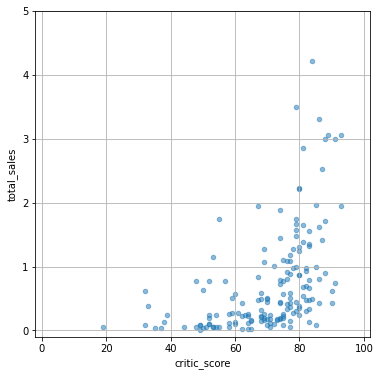

In [28]:
correlation('X360', current_df['critic_score'], 'critic_score')

Для платформы X360 за 2012-2016 годы корреляция продаж с user_score составляет: 0.006163978646213392


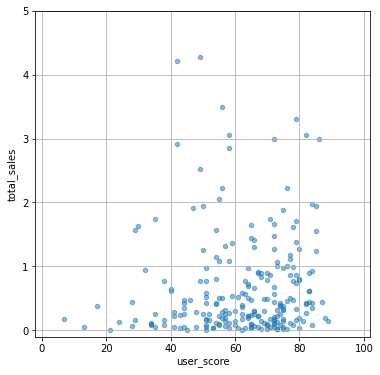

In [29]:
correlation('X360', current_df['user_score'], 'user_score')

Для платформы `X360` ситуация аналогичная: слабая прямая взаимосвязь продаж с оценками критиков и отсутствие взаимосвязи с оценками пользователей.

Для платформы PS4 за 2012-2016 годы корреляция продаж с critic_score составляет: 0.406567902061781


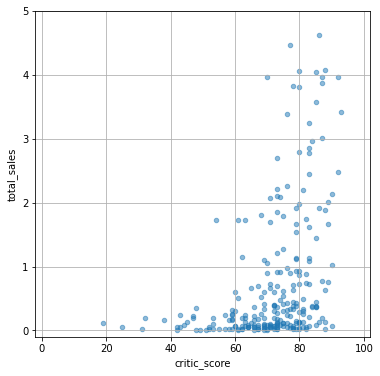

In [30]:
correlation('PS4', current_df['critic_score'], 'critic_score')

Для платформы PS4 за 2012-2016 годы корреляция продаж с user_score составляет: -0.03195711020455641


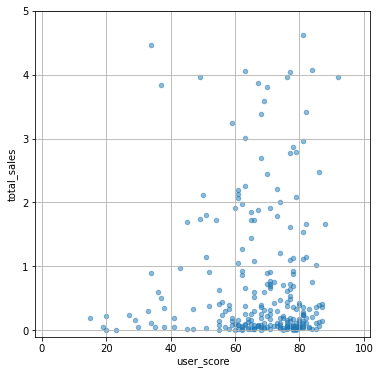

In [31]:
correlation('PS4', current_df['user_score'], 'user_score')

Для платформы `PS4` ситуация аналогичная: слабая прямая взаимосвязь продаж с оценками критиков и отсутствие взаимосвязи с оценками пользователей.

Для платформы XOne за 2012-2016 годы корреляция продаж с critic_score составляет: 0.41699832800840175


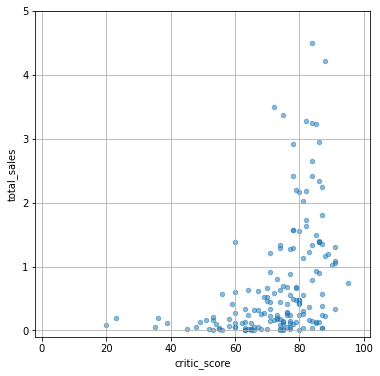

In [32]:
correlation('XOne', current_df['critic_score'], 'critic_score')

Для платформы XOne за 2012-2016 годы корреляция продаж с user_score составляет: -0.06892505328279411


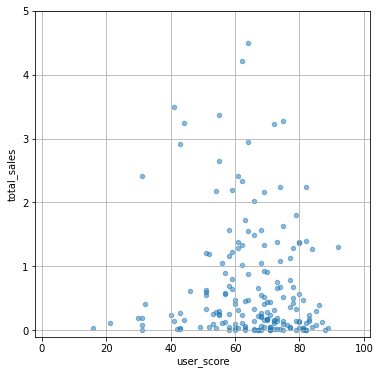

In [33]:
correlation('XOne', current_df['user_score'], 'user_score')

Для платформы `XOne` ситуация аналогичная: слабая прямая взаимосвязь продаж с оценками критиков и отсутствие взаимосвязи с оценками пользователей.

Для платформы PC за 2012-2016 годы корреляция продаж с critic_score составляет: 0.23724324311567918


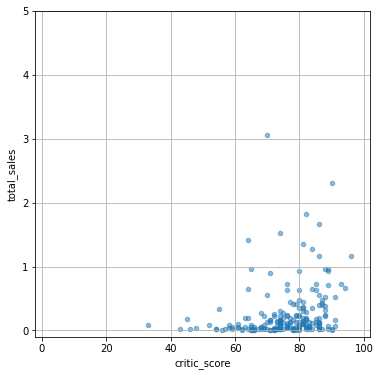

In [34]:
correlation('PC', current_df['critic_score'], 'critic_score')

Для платформы PC за 2012-2016 годы корреляция продаж с user_score составляет: -0.12186747630735582


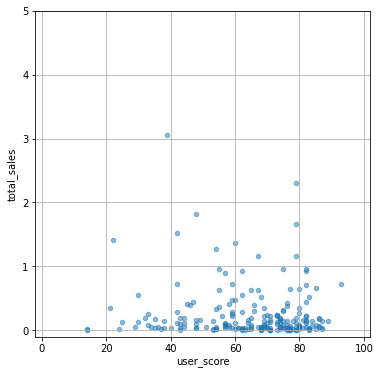

In [35]:
correlation('PC', current_df['user_score'], 'user_score')

Для платформы `PC`: слабая прямая взаимосвязь продаж с оценками критиков и очень слабая отрицательная взаимосвязь с оценками пользователей.

Для платформы 3DS за 2012-2016 годы корреляция продаж с critic_score составляет: 0.32080286953607845


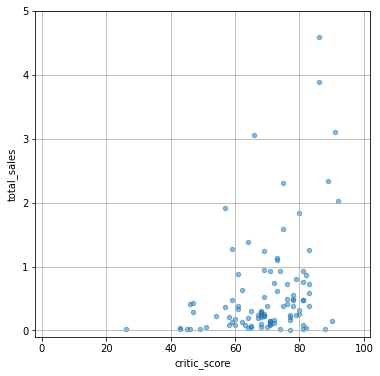

In [36]:
correlation('3DS', current_df['critic_score'], 'critic_score')

Для платформы 3DS за 2012-2016 годы корреляция продаж с user_score составляет: 0.197582634110386


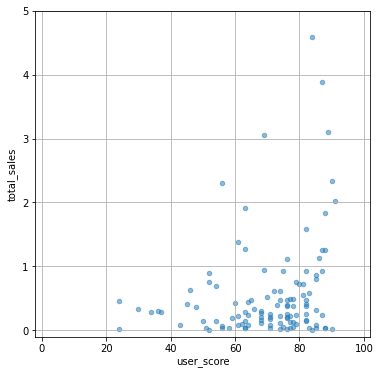

In [37]:
correlation('3DS', current_df['user_score'], 'user_score')

Для платформы `3DS`: слабая прямая взаимосвязь продаж с оценками критиков и пользователей.

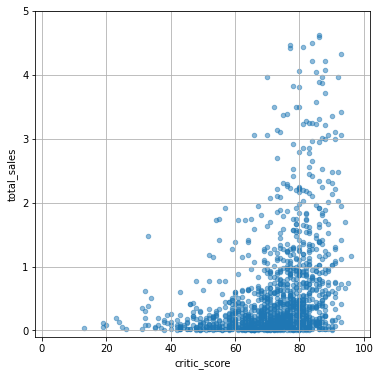

In [38]:
current_df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6, 6), grid=True)
plt.xlim(-2, 102)
plt.ylim(-0.1, 5)
None

In [39]:
current_df['total_sales'].corr(current_df['critic_score'])

0.3081967459207781

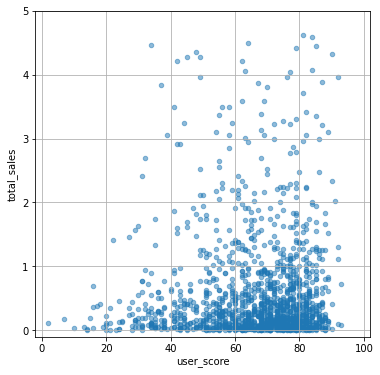

In [40]:
current_df.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6, 6), grid=True)
plt.xlim(-2, 102)
plt.ylim(-0.1, 5)
None

In [41]:
current_df['total_sales'].corr(current_df['user_score'])

0.004428817675493268

**Выводы**

Как в частном, так и в общем случае, профессиональные оценки имеют слабую прямую взаимосвязь с продажами игры. В случае пользовательских оценок связь как правило отсутствует. В целом можно повторить вывод - успешная игра скорее всего будет иметь высокие оценки, в то время как высокие оценки вообще ничего не гарантируют.

Исследуем жанры

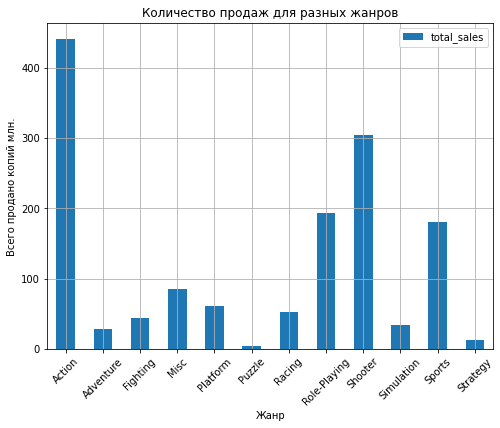

In [42]:
# Смотрим общие продаже каждого жанра (2012-2016)
current_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_index().plot.bar(grid=True, figsize=(8, 6), rot=45)
plt.xlabel('Жанр')
plt.ylabel('Всего продано копий млн.')
plt.title('Количество продаж для разных жанров')
None

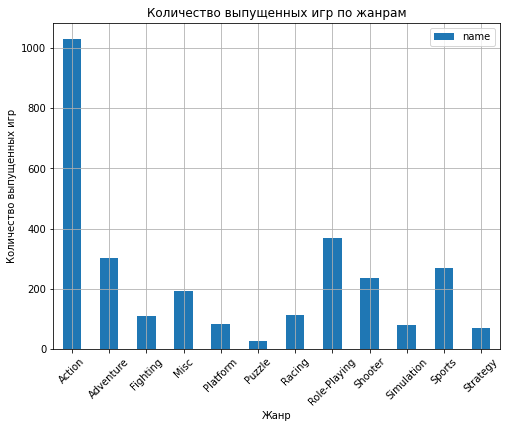

In [43]:
# Смотрим количество игр каждого жанра (2012-2016)
current_df.pivot_table(index='genre', values='name', aggfunc='count').sort_index().plot.bar(grid=True, figsize=(8, 6), rot=45)
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по жанрам')
None

In [44]:
# смотрим среднее количество продаж одной игры каждого жанра (2012-2016)
current_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_index() / current_df.pivot_table(index='genre', values='total_sales', aggfunc='count').sort_index()

,total_sales
genre,
Action,0.427856
Adventure,0.097450
Fighting,0.408165
Misc,0.442917
Platform,0.717647
Puzzle,0.174643
Racing,0.465217
Role-Playing,0.521081
Shooter,1.296723


`Action` и `Shooter` по абсолютному количеству продаж лучше всех, `Sports` и `Role-Playing` немного отстают, остальные даже не рядом.
Однако 36% всех игры отнесено к жанру `Action`, так что будем смотреть относительные успехи.
    
Лучше всех продаются шутеры - в среднем уходит 1,3 миллиона копий каждой игры. На втором месте платформеры, на третьем - спортивные симуляторы. Экшены лишь на седьмом.
    
Хуже всех дела обстоят у `Adventure`, `Puzzle` и `Strategy`. Однако не могу согласится с местным содержанием жанра `Adventure`, там и такие крепкие экшены как "Rise of the Tomb Raider", и графические квесты, и интерактивное кино от Telltale Games. Очень разношёрстный набор игр, непонятные представители которого тянут вполне себе успешные проекты на дно. Пазлов всего 20 штук, не очень репрезентативная выборка. А вот стратегии действительно давно мертвы, после своего расцвета в нулевых ... Press F to pay respects

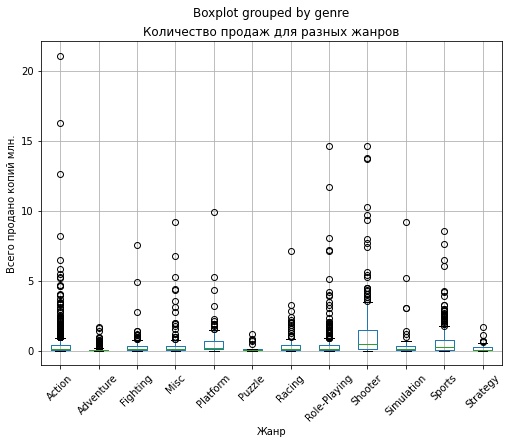

In [45]:
current_df.boxplot(column='total_sales', by='genre', grid=True, figsize=(8, 6), rot=45)
plt.xlabel('Жанр')
plt.ylabel('Всего продано копий млн.')
plt.title('Количество продаж для разных жанров')
None

**Результаты исследовательского анализа данных**

- игровая индустрия начала активно разростаться в середине 90-ых годов;
- срок жизни одной платформы (одного поколения консолей) составляет примерно 5-7 лет;
- консольный рынок поделили между собой PlaStation, Nintendo и Microsoft;
- при переходе консолей с прошлого поколения на новое, ситуация на рынке особо не меняется;
- у оценок игры и количством её продаж есть слабая положительная взаимосвязь:
    - 0.25 в случае оценок критиков;
    - 0.1 в случае оценок пользователей.
- успешная игра скорее всего будет иметь высокие оценки, в то время как высокие оценки вообще ничего не гарантируют;
- шире всего представлен жанр игр `Action`;
- самым успешным жанром в пересчёте продаж на одну игру является `Shooter`;
- хуже всех дела обстоят у жанров `Puzzle` и `Strategy`.

## Этап 4. Анализ пользователей

Напишем функцию, принимающую на вход параметр категоризации и регион

In [46]:
def features_of_the_region(category, region):
    category_sales = current_df.pivot_table(index=category, values=region, aggfunc='sum').sort_values(by=region, ascending=False).head(8)
    plt.subplots(figsize =(6, 6))
    plt.pie(category_sales[region], labels = category_sales[region].index, autopct='%1.f%%')
    return category_sales.head(5)

Визуализируем популярность платформ в разных регионах

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


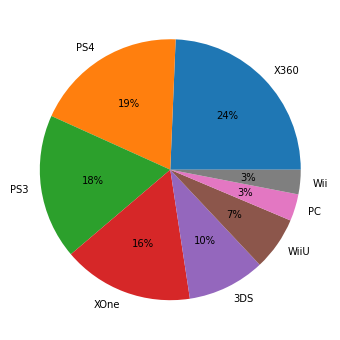

In [47]:
features_of_the_region('platform', 'na_sales')

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


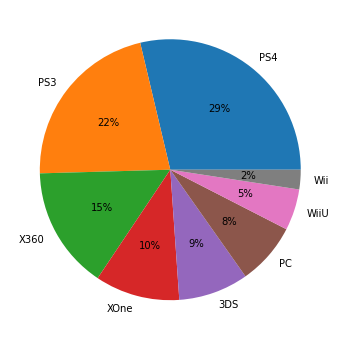

In [48]:
features_of_the_region('platform', 'eu_sales')

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


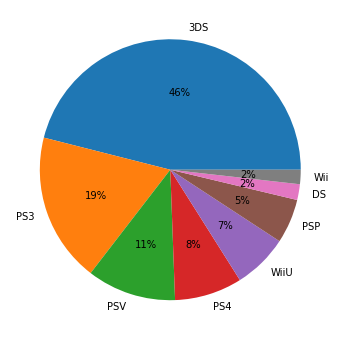

In [49]:
features_of_the_region('platform', 'jp_sales')

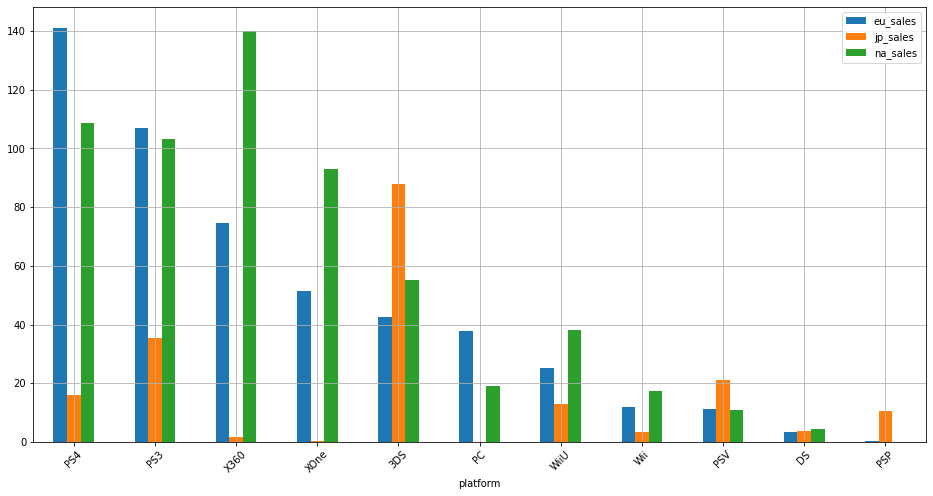

In [50]:
current_df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(16, 8), grid=True, rot=45)
None

Если смотреть сухие цифры, то:    
    
- В Северной Америке наиболее популярными являются платформы `X360` и `PS4`. 
- В Европе наиболее популярными являются платформы `PS4` и `PS3`.
- В Японии наиболее популярными являются платформы `3DS` и `PS3`.

Однако не стоит забывать, что происходит постепенный переход пользователй с консолей старого поколения на консоли нового поколения, поэтому в перспективе доли `PS3` и `X360` будут снижаться, а доли `PS4` и `XOne` - расти.
    
В таком случае делаем следующий вывод:

- Американцы предпочитают консоли X-Box (40%);
- Европейцы предпочитают консоли SonyPlastation (51%);
- Японцы предпочитают портативные консоли (64%), игр для таких консолей там покупают чуть ли не больше, чем в Северной Америке и Европе вместе взятых;   
     
При этом Японцы придерживаются своих национальных брендов - Nintendo и SonyPlaystation, Практически полностью игнорируя X-Box от Microsoft.

Визуализируем популярность жанров в разных регионах

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


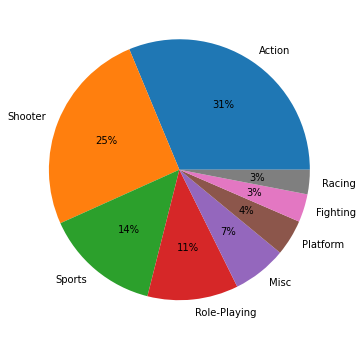

In [51]:
features_of_the_region('genre', 'na_sales')

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


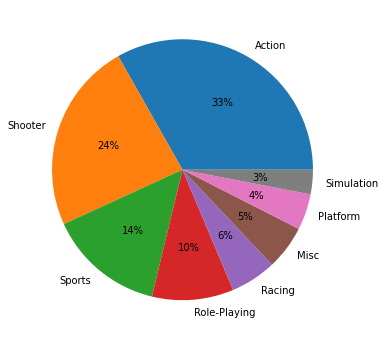

In [52]:
features_of_the_region('genre', 'eu_sales')

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


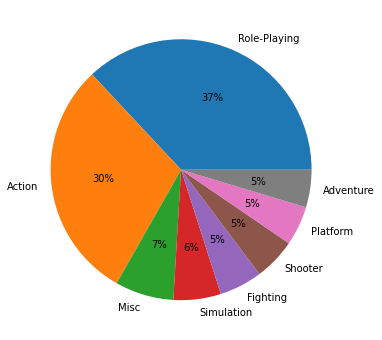

In [53]:
features_of_the_region('genre', 'jp_sales')

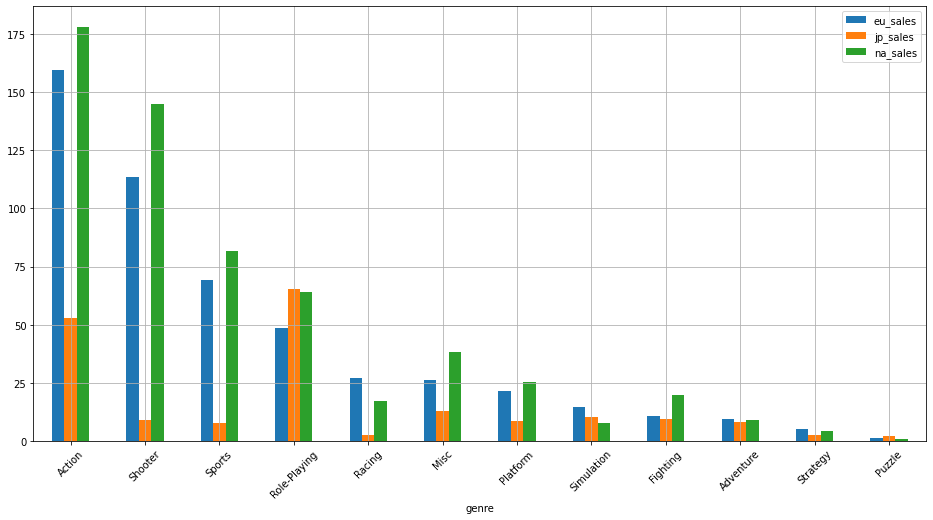

In [54]:
current_df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(16, 8), grid=True, rot=45)
None

- В Северной Америке наиболее популярными жанрами являются `Action` и `Shooter`. 
- В Европе наиболее популярными жанрами являются `Action` и `Shooter`.
- В Японии наиболее популярными жанрами являются `Role-Playing` и `Action`.

Визуализируем популярность игр разного рейтинга в разных регионах

* E («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. 
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
    

,na_sales
esrb_rating,
M,231.57
E,114.37
No_ESRB,103.31
E10+,75.70
T,66.02


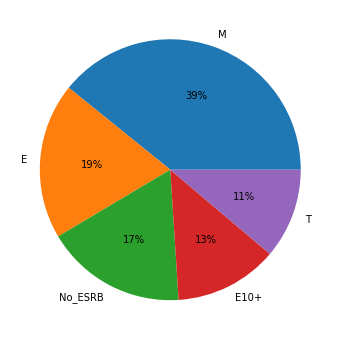

In [55]:
features_of_the_region('esrb_rating', 'na_sales')

,eu_sales
esrb_rating,
M,193.96
E,113.03
No_ESRB,91.50
E10+,55.37
T,52.96


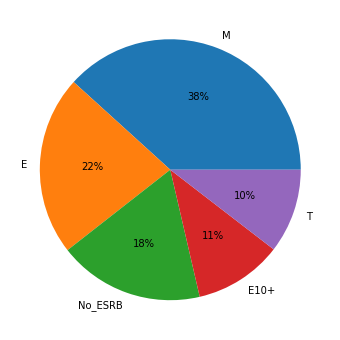

In [56]:
features_of_the_region('esrb_rating', 'eu_sales')

,jp_sales
esrb_rating,
No_ESRB,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


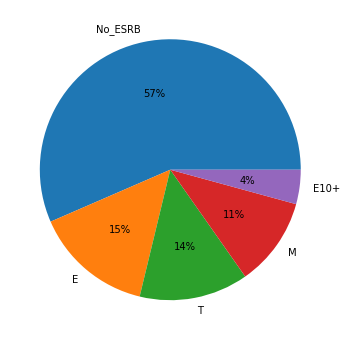

In [57]:
features_of_the_region('esrb_rating', 'jp_sales')

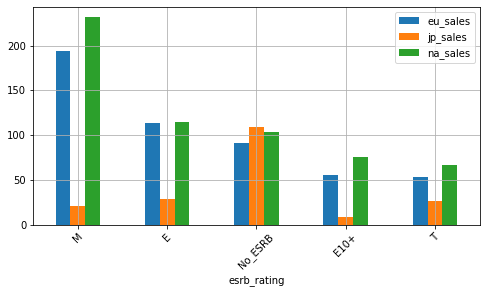

In [58]:
current_df.pivot_table(index='esrb_rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(8, 4), grid=True, rot=45)
None

- В Северной Америке и европе ситуация практически идентичная - примерно 40% купленных игр имеют рейтинг M, 20% - рейтинг Е, 20% - не имеют рейтинга ESRB, оставшиеся 20% поровну делят игры с рейтингами Т и Е10+.
- В Японии подавляющая доля купленных игр (60%) не имеет рейтинга ESRB. В процентном соотношении гораздо менее популярны игры с рейтингом М, и более популярны игры с рейтингом Т.
    
Можно сделать вывод, что Японцы играют в "свои" игры с рейтингом M («Mature») — «Для взрослых».

**Выводы**

- средний пользователь из Северной Америки играет на своём X-Box 360 в экшен с рейтингом М;
- средний пользователь из Европы играет на своей PlayStation 4 в экшен с рейтингом М; 
- средний пользователь из Японии играет на своём портативном Nintendo 3DS в РПГ с рейтингом Е.

## Этап 5. Проверка гипотез

In [60]:
alpha = 0.05

Xbox One и PC одинаково популярны у пользователей.
    
- H₀: средние пользовательские рейтинги платформ Xbox One и PC равны;
- H₁: средние пользовательские рейтинги платформ Xbox One и PC не равны;

In [61]:
sample_1 = current_df.query('~user_score.isna() and platform == "XOne"')['user_score']
sample_2 = current_df.query('~user_score.isna() and platform == "PC"')['user_score']
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643805
Не получилось отвергнуть нулевую гипотезу


У нас не получилось отвергнуть нулевую гипотезу на 5%-ом уровне значимости, а значит мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC не равны. (то-есть могут быть равны, на 100% мы не уверены, но могут быть)

Жанры Action и Sports одинаково популярны у пользователей.

- H₀: средние пользовательские рейтинги жанров Action и Sports равны;
- H₁: средние пользовательские рейтинги жанров Action и Sports не равны;

In [64]:
sample_1 = current_df.query('~user_score.isna() and genre == "Action"')['user_score']
sample_2 = current_df.query('~user_score.isna() and genre == "Sports"')['user_score']
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.7163089460930885e-26
Отвергаем нулевую гипотезу


У нас получилось отвергнуть нулевую гипотезу на 5%-ом уровне значимости, а значит мы можем утверждать, что средние пользовательские рейтинги жанров Action и Sports не равны.
   

**Результаты проврки гипотез**
- мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC не равны;
- мы можем утверждать, что средние пользовательские рейтинги жанров Action и Sports не равны.    


## Этап 6. Результаты исследования

В распоряжении было данные о продажах 16715 игр, их оценках от пользователей и экспертов, жанры и платформы. Нужно было нужно выявить определяющие успешность игры закономерности.
    
В данных имелось незначительное количество пропусков (2% наблюдений), которые были удалены.
    
В процессе исследовательского анализа была обнаружен следующиая информация:
- срок жизни одной платформы (одного поколения консолей) составляет примерно 5-7 лет;
- консольный рынок поделили между собой PlaStation, Nintendo и Microsoft;    
- у оценок игры и количством её продаж есть слабая положительная взаимосвязь:
- успешная игра скорее всего будет иметь высокие оценки, в то время как высокие оценки вообще ничего не гарантируют;
- самым успешным жанром в пересчёте продаж на одну игру является Shooter, худшими - Puzzle и Strategy;
- средний пользователь из Северной Америки играет на своём X-Box 360 в экшен с рейтингом М;
- средний пользователь из Европы играет на своей PlayStation 4 в экшен с рейтингом М;
- средний пользователь из Японии играет на своём портативном Nintendo 3DS в РПГ без рейтинга ЕSRB.

Исходя из этого будут следующие рекомендации:
- работать на Америку и Европу, их рынки очень похожи, а вот в Японии своя атмосфера, свои платформы, свои игры, да и покупателей гораздо меньше;
- забыть про платформы прошлого поколения, думать только о текущем (`PS4`, `XOne`);
- стоит добиться высоких оценок от критиков, это может помочь продажам;
- вложиться либо в надёжные жанры, такие как `Shooter` и `Sports`, либо в жанр `Platform`, спрос на который сравнительно невысок, но из-за очень низкой конкуренции внутри жанра, может сработать;
- интересующий рейтинг ESRB - М.